In [8]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
#Load the file
df = pd.read_excel(r'exo3_2.xlsx')
a = [0.06 , 0.08 , 0.1]

In [19]:
# Compute yields
df['yields'] = -np.log(df['D'])/df['T']

In [27]:
# Get the beta of the regre
Y = df['yields'] * df['T']
I_0 = df['T']
Beta = pd.DataFrame(index = ['B0' , 'B1' , 'B2'] , columns = a)
for i in range(len(a)):
    I_1 = (1 - np.exp(- a[i] * df['T'])) / a[i] 
    I_2 = I_1 - np.exp(- a[i] * df['T']) * df['T']
    X = pd.DataFrame({'I_0' : I_0 , 'I_1' : I_1 , 'I_2' : I_2})
    model = sm.OLS(Y,X).fit()
    Beta.at[:,a[i]] = model.params.to_list()

In [36]:
Beta

,0.06,0.08,0.10
B0,-0.015527,0.004747,0.013846
B1,0.014498,-0.007687,-0.018609
B2,0.108533,0.075720,0.059084


In [32]:
I_0 = [1] * len(df)
for i in range(len(a)):
    I_1 = np.exp(- a[i] * df['T'])
    I_2 = I_1 * a[i] * df['T']
    X = pd.DataFrame({'I_0' : I_0 , 'I_1' : I_1 , 'I_2' : I_2})
    X = np.array(X)
    df['fwd alpha = ' + str(a[i])] = np.matmul(np.array(X) , np.array(Beta.loc[:,a[i]]))

Text(0, 0.5, 'Forward Rate')

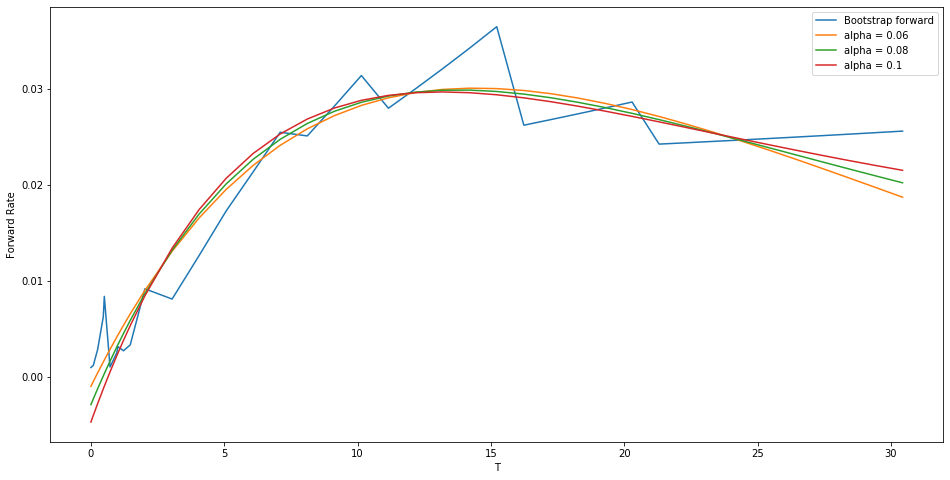

In [35]:
plt.figure(figsize = (16,8))
plt.plot(df['T'],df.f,label = 'Bootstrap forward')
for i in range(len(a)):
    plt.plot(df['T'],df['fwd alpha = ' + str(a[i])],label = 'alpha = ' + str(a[i]))
plt.legend()
plt.xlabel('T')
plt.ylabel('Forward Rate')